In [25]:
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import os
import json
from matplotlib import pyplot as plt


In [26]:
#### only change this  #####
config_path = "/home/reinhold/Daten/OPEN_4ds/generated_config"
zoom = False  # zoom in low range of x-axis (days/person)
############################

In [27]:

# load the config files and the variables from the upset_plot-section of the config file
config_filename = "config_viz.json"
f = open(os.path.join(config_path, config_filename))
IO_json = json.load(f)


root_data_dir_name = IO_json["root_data_dir_name"]
# requires the "per_pm_id_date"-file, not applicable to the per_pm_id-case
input = IO_json["summary_plots"]["input"]["per_pm_id_date"]
dataset_labels = IO_json["summary_plots"]["dataset_labels"]
output = IO_json["summary_plots"]["days_per_person_output"]

print(dataset_labels)

['OpenAPS (NS)', 'OPENonOH (NS)', 'OPENonOH (AAPS_Uploader)', 'OpenAPS (AAPS_Uploader)']


In [28]:

df = pd.read_csv(os.path.join(root_data_dir_name, input[0], input[1]), header=0, parse_dates=[1], index_col=0)
#df2 = df[["belongs_to_datasets", "person_id", "date"]].groupby(["belongs_to_datasets", "person_id"]).agg("count")
df2 = df[["belongs_to_datasets", "person_id", "date"]].groupby(["belongs_to_datasets", "person_id"],dropna=False,as_index=False).agg("count")
print(df2)
df2.to_csv(os.path.join(root_data_dir_name, "df2_test.csv"))


    belongs_to_datasets  person_id  date
0                     0          0    14
1                     0          1   113
2                     0          2    22
3                     0          5    90
4                     0          7     2
..                  ...        ...   ...
284                   3        215    13
285                   3        216    11
286                   3        217    11
287                   3        218     8
288                   3        219     9

[289 rows x 3 columns]


In [29]:
#print(df2[df2["belongs_to_datasets"]=="1"]["date"])
person_count_min = df2["date"].min()
person_count_max = df2["date"].max()
print(person_count_min, person_count_max)

1 1399


0 (97, array([  14,  113,   22,   90,    2,    1,    3,    6,   11,    1,    5,
         26,  213,  130,  272,  192,  186,   38,   10,  272,  517,    2,
        113,   98,  231,  722,  267,  773,  800,  131,  794,   22, 1276,
         38,  558,  174,    2,   68,  108,    7,   28,  771, 1102, 1080,
        380,  303,  135,  151,  128,  936,    4,  208,  105,   41,  408,
        107,    3,  127,   24,  191,  883,  355, 1289,   89,    1,   90,
        359,  159,   84,  203,  273,   97,    2,  583,  391,   14,    6,
        118,  109,  119,  230,  247,  449,   11,   97, 1088,  276,  360,
        383,    1,  355,  182,   72,    5,  247,  106,  735]), '0')
1 (70, array([ 660,  567,  356, 1399,  594,  101,  683,  648,  563,   11,    6,
         11,  185,   68,  712, 1276,  399,  267,  551,  116,  358,  142,
         62,   73,  209,  605,  246,  398,  152,  948,   25,  336,  512,
        655,   27,  191,  100,  392,  314,   11,  237,  388,  396,  258,
        442,   36,  459,  562,  436,  263,

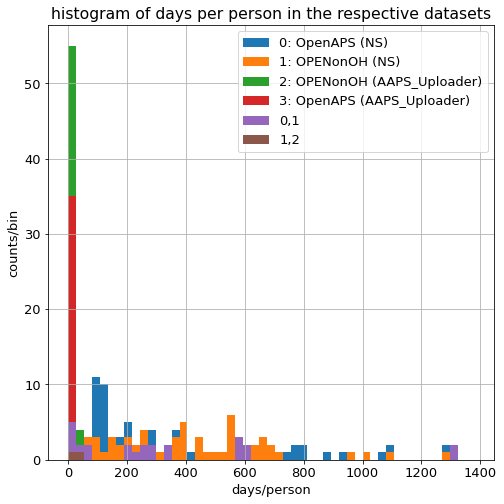

In [30]:
plt.rcParams.update({"figure.facecolor" : (1.0, 1.0, 1.0, 1.0), "savefig.facecolor": (1.0, 1.0, 1.0, 1.0)})
plt.rcParams["font.size"] = 13
plt.figure(figsize=(8,8))
plt.tight_layout()
plt.grid()
bin_width = int((person_count_max-person_count_min)*0.02)  # 50 bins
if bin_width < 1: bin_width = 1
bins = range(person_count_min, person_count_max, bin_width)

if zoom: # show low range
    bin_width = 1
    bins = range(30)

person_counts = {}
for ds in df["belongs_to_datasets"].unique():
    #print(ds)
    person_count_values = df2[df2["belongs_to_datasets"]==ds]["date"].values
    if len(person_count_values) > 0: 
        person_counts[ds] = (len(person_count_values), person_count_values, ds)

for pc in sorted(person_counts, key=lambda x: person_counts[x][0], reverse=True):
    print(pc, person_counts[pc])
    try:
        ds_index = int(person_counts[pc][2])
        label_ = f"{person_counts[pc][2]}: {dataset_labels[ds_index]}"
    except ValueError:
        label_ = person_counts[pc][2]
    #plt.hist(person_counts[pc][1], bins=bins, histtype="bar", label=f"{label_} ({len(person_counts[pc][1])} persons)")
    plt.hist(person_counts[pc][1], bins=bins, histtype="bar", label=f"{label_}")
plt.title(output[2])
plt.xlabel("days/person")
plt.ylabel("counts/bin")
    
plt.legend()
#plt.show()


filename = output[1]
if zoom:
    fn,ext = os.path.splitext(output[1])
    filename = f"{fn}_zoom{ext}"
plt.savefig(os.path.join(root_data_dir_name, output[0], filename))
print(os.path.join(root_data_dir_name, output[0], filename))